In [103]:
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [104]:
# El numero de neuronas de la imagen codificada
encoding_dim = 128 

# La imagen de input
input_img = keras.Input(shape=(784,))
# "encoded" es la representacion codificada de la imagen en dimensiones menores
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" es la reconstruccion de la imagen a partir de la informacion codificada
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# Este es el modelo desde la imagen -> codificacion -> imagen reconstruida
autoencoder = keras.Model(input_img, decoded)

In [105]:
# Este modelo codifica la imagen original 
encoder = keras.Model(input_img, encoded)

In [106]:
# El input es la imagen codificada de dim=32
encoded_input = keras.Input(shape=(encoding_dim,))
# Se recupera la ultima capa del modelo completo de autoencoder
decoder_layer = autoencoder.layers[-1]
# Se crea el modelo de decodificador
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [107]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [108]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [109]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
6000/6000 [==============================] - 6s 991us/step - loss: 0.1322 - val_loss: 0.0720
Epoch 2/10
6000/6000 [==============================] - 6s 958us/step - loss: 0.0712 - val_loss: 0.0685
Epoch 3/10
6000/6000 [==============================] - 6s 942us/step - loss: 0.0687 - val_loss: 0.0678
Epoch 4/10
6000/6000 [==============================] - 6s 985us/step - loss: 0.0677 - val_loss: 0.0672
Epoch 5/10
6000/6000 [==============================] - 6s 976us/step - loss: 0.0674 - val_loss: 0.0671
Epoch 6/10
6000/6000 [==============================] - 6s 963us/step - loss: 0.0672 - val_loss: 0.0668
Epoch 7/10
6000/6000 [==============================] - 6s 965us/step - loss: 0.0670 - val_loss: 0.0668
Epoch 8/10
6000/6000 [==============================] - 6s 1ms/step - loss: 0.0670 - val_loss: 0.0668
Epoch 9/10
6000/6000 [==============================] - 6s 978us/step - loss: 0.0669 - val_loss: 0.0666
Epoch 10/10
6000/6000 [==============================] - 6s 950us/

In [110]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

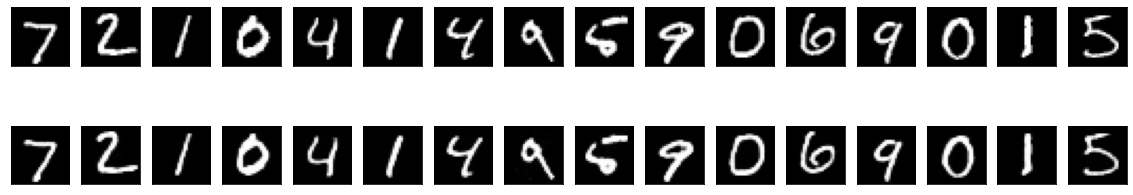

In [111]:
n =16 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[[ 2.1964654   4.03027681  1.77878846  5.07434342  2.17405602 11.37870339
   2.28043677  4.48704245  8.43747928  0.94072641  5.37454648  4.59551086
   2.51198295  6.36121207  1.03632473  7.77109343  5.76596282  0.95919559
   2.47438202  2.68597538  1.99359647  1.77596831  2.98789216  0.53216369
   1.92976108  4.33348605  5.13820601  2.38445099  6.15138     2.74421163
   2.717511   10.72655546  0.94040708  8.13138926  0.96085839 10.03863902
   6.9426406   3.16124646  0.39779067  2.11982176  5.39430234  3.75382326
   3.11351404  4.71809704  6.32596643  1.05954786  1.10278358  8.18457488
   4.55606926  6.65050423  3.56941402  0.17204509  4.79235829  2.852026
   3.07038271  0.07553061  6.57131113  9.83771835  8.98491896  1.44240275
   0.74349294  3.46743703  5.51248892  0.64330055  4.51820211  4.4827817
   0.23657076  3.23725314  4.79104571  6.09274307  8.15306178  3.08677135
   2.43750289  4.31198396  1.76510035  8.77534591  1.65698339  3.3214088
   3.78787788  4.22970061  5.11731082  0.6

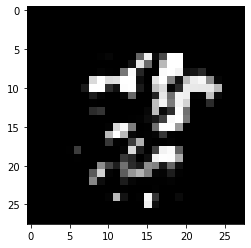

In [112]:
# Se decodifica un input aleatorio de valores

random_noise_img = randn(encoding_dim).reshape(1,encoding_dim)
print(abs(random_noise_img*5))
decoded_random = decoder.predict(abs(random_noise_img*5))
plt.imshow(decoded_random.reshape(28, 28))

[[2.13184166 1.95652127 1.31478524 0.6497767  0.82474786 1.13448238
  1.69931722 2.10388422 2.01320076 1.83817041 1.7523737  1.244977
  1.82429457 4.47074032 1.46926451 1.16338539 1.93437362 2.22230196
  1.55743682 2.74049044 2.40294576 1.5659399  1.0785768  2.23819542
  1.71599126 1.71754229 0.8944813  1.44523239 2.46438932 2.29599643
  1.05116105 2.34739637 3.30427527 3.91614914 3.09945321 0.91509503
  1.03642201 1.73745716 3.38947177 2.66956949 4.97220135 1.9139663
  1.1750648  1.54055858 1.02733898 2.57738352 2.00148678 3.15591979
  2.70888495 1.3730402  0.8147006  0.90398127 2.93207693 2.19658446
  1.41839576 2.61251163 0.57162148 0.4849987  1.75711966 0.96911442
  2.00156116 2.42006826 0.55818713 2.19706655 2.54048443 1.39317119
  2.28242445 1.44325089 1.13301671 2.32177639 2.77506161 1.9781965
  1.65400648 2.32595873 0.62743819 1.32866645 0.3308942  2.30746102
  1.50314057 1.44750023 1.81987977 2.07081437 2.07414436 1.33645749
  0.53550988 1.58447075 1.10939717 0.92708695 2.0168

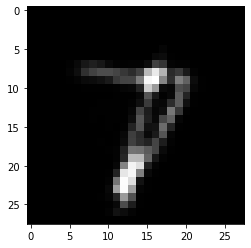

In [114]:
avrg =[]
for a,b in zip(encoded_imgs[0], encoded_imgs[2]):
    avrg.append((a+b)/2)
avrg = np.array(avrg).reshape(1,encoding_dim)
print(avrg)
avrg_num = decoder.predict(avrg)
plt.imshow(avrg_num.reshape(28,28))